# Calculate the rank of each county for each feature and for each subset of the population

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
# from scipy import stats
# import pickle

import matplotlib.pyplot as plt

In [3]:
# import seaborn as sns
# sns.set()

In [2]:
params = { 'axes.grid': True
          ,'axes.axisbelow': True
          ,'grid.color': '0.5'
          ,'legend.numpoints': 1
          ,'savefig.bbox': 'tight'
          ,'font.size': 16
          ,'legend.loc': 'best'
          ,'legend.fontsize': 'medium'
          #,'lines.markersize': 6
          ,'xtick.labelsize': 'small'
          ,'ytick.labelsize': 'small'
          #,'xtick.direction': 'out'
          #,'ytick.direction': 'out'
          ,'figure.figsize': [8, 6]
          #,'axes.labelsize': 'large'   # no need to change these sizes, just change font.size
          #,'axes.titlesize': 'x-large'
}
plt.rcParams.update(params)

# Get the data

In [6]:
impact_df= pd.read_csv('impactscore_2014.csv')
impact_df.head()

,AQI Median,O3 AQI,PM2.5 AQI,Population near busy roads (%),Area burned percent
0,4.660000,8.524133,9.440333,0.000000,2.235556
1,21.322333,0.000000,0.000000,0.000000,0.000000
2,2.603667,16.981889,3.322333,12.307333,1.589111
3,6.009333,11.907667,3.322333,0.000000,0.000000
4,10.725756,3.438333,2.233067,0.639667,0.473000


In [7]:
county_info_df =pd.read_csv('index_2014.csv')
county_info_df.head()

,County,Year,Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other,Rate (per 10k),Rate predict
0,Alameda,2014,1,0,0,1,0,0,0,329.94,299.221778
1,Alameda,2014,1,1,0,1,0,0,0,596.67,618.332822
2,Alameda,2014,0,0,0,1,0,0,0,223.52,225.082222
3,Alameda,2014,0,1,0,1,0,0,0,304.49,254.442056
4,Alameda,2014,1,0,0,0,1,0,0,39.63,39.203222


### Select the subset of population

In [10]:
vals= ['Los Angeles',1,1,0,1,0,0,0]
inds= (county_info_df.iloc[:,0]==vals[0]) & (county_info_df.iloc[:,2]==vals[1]) & (county_info_df.iloc[:,3]==vals[2]) & (county_info_df.iloc[:,4]==vals[3]) & (county_info_df.iloc[:,5]==vals[4]) & (county_info_df.iloc[:,6]==vals[5]) & (county_info_df.iloc[:,7]==vals[6]) & (county_info_df.iloc[:,8]==vals[7])

In [11]:
county_info_df.loc[inds]

,County,Year,Age (<4YO),Gender (M),White,African,Asian,Hispanic,Other,Rate (per 10k),Rate predict
118,Los Angeles,2014,1,1,0,1,0,0,0,416.86,454.154778


In [18]:
focus_df= impact_df.loc[inds]
focus_df

,AQI Median,O3 AQI,PM2.5 AQI,Population near busy roads (%),Area burned percent
118,8.002622,7.971,9.227333,1.279333,0.0


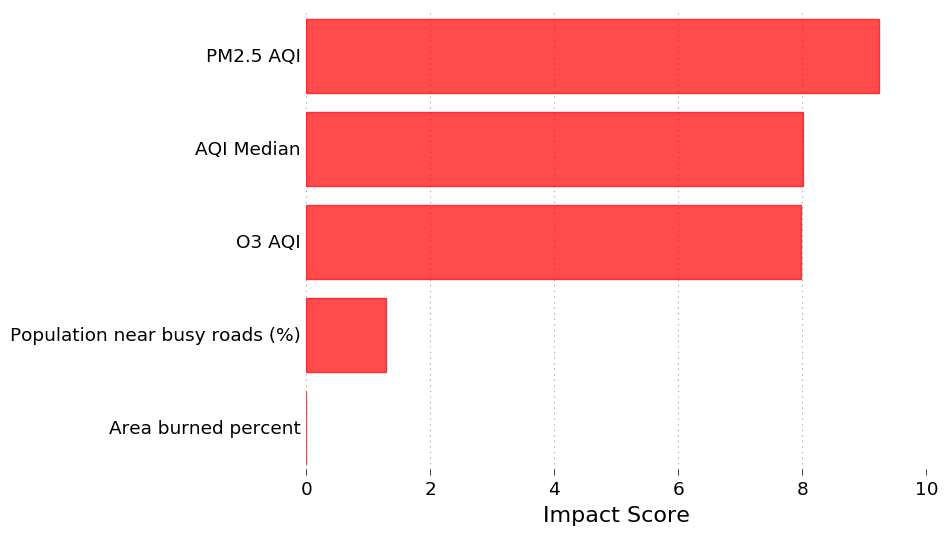

In [32]:
plt.figure(figsize=(8,6))
ax= plt.subplot(111)

feats_impact= np.array(focus_ds).squeeze()
feats_name= focus_ds.columns

Nlim= len(feats_impact)
indsPLT= np.arange(Nlim)
width= 0.8
shift= 0.5*(1.-width)

indsSort= np.argsort(feats_impact)
plt.barh(indsPLT+shift, feats_impact[indsSort], height=width, color='r',ec='r',alpha=.7)

# plt.xlim(xmin=-0.1)
plt.ylim(0,Nlim)
plt.grid(axis='y')
plt.yticks(indsPLT+0.5,feats_name[indsSort])
plt.xlabel('Impact Score')

ax.yaxis.set_ticks_position('none')
ax.set_frame_on(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')

plt.savefig('temp_impactscore.png')